In [1]:
print('hello world')

hello world


# Lib Impoort

In [2]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
import community as community_louvain
import random


# Data Load

## GRN - Gene Regulatory Network
| Column         | Meaning                                                                                                                                           |
| -------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **TF**         | Transcription factor (gene) that regulates others — this is your **source node** in the GRN.                                                      |
| **Target**     | The gene that is being regulated by the TF — this is your **target node** in the GRN.                                                             |
| **Regulation** | The type of regulation: typically **“Activation”** or **“Repression”**, describing whether the TF increases or decreases the target’s expression. |
| **PMID**       | PubMed ID of the publication providing evidence for this TF–target relationship.                                                                  |


In [3]:
#Load the GRN database
grn_df = pd.read_csv('Data/trrust_rawdata.human.tsv', sep = '\t', header=None,names=["TF", "Target", "Regulation", "PMID"])	
grn_df.head()

,TF,Target,Regulation,PMID
0,AATF,BAX,Repression,22909821
1,AATF,CDKN1A,Unknown,17157788
2,AATF,KLK3,Unknown,23146908
3,AATF,MYC,Activation,20549547
4,AATF,TP53,Unknown,17157788


In [20]:
grn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TF          9396 non-null   object
 1   Target      9396 non-null   object
 2   Regulation  9396 non-null   object
 3   PMID        9396 non-null   object
dtypes: object(4)
memory usage: 293.8+ KB


In [4]:
unique_tf = grn_df["TF"].unique()
unique_target = grn_df["Target"].unique()

# Combine them into one set for unique values
unique_genes = set(unique_tf).union(unique_target)

# Convert to sorted list (optional)
unique_gene_list = sorted(list(unique_genes))

print(unique_gene_list)

['A2M', 'AATF', 'ABCA1', 'ABCA3', 'ABCB1', 'ABCB11', 'ABCB4', 'ABCB8', 'ABCC1', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC6', 'ABCG1', 'ABCG2', 'ABCG4', 'ABCG5', 'ABCG8', 'ABL1', 'ABL2', 'ACACA', 'ACACB', 'ACADL', 'ACAN', 'ACAT1', 'ACAT2', 'ACBD3', 'ACE', 'ACE2', 'ACHE', 'ACKR1', 'ACKR3', 'ACLY', 'ACO1', 'ACOT7', 'ACOX1', 'ACP5', 'ACR', 'ACRV1', 'ACSL1', 'ACTA1', 'ACTA2', 'ACTC1', 'ACTG2', 'ACTN4', 'ACVRL1', 'ADA', 'ADAM10', 'ADAM12', 'ADAM17', 'ADAM23', 'ADAMTS1', 'ADAMTS5', 'ADARB2', 'ADGRB1', 'ADGRE5', 'ADH1A', 'ADH5', 'ADH6', 'ADIPOQ', 'ADIPOR1', 'ADIPOR2', 'ADM', 'ADORA1', 'ADORA2A', 'ADORA3', 'ADRA1A', 'ADRA2B', 'ADRB2', 'ADRB3', 'AES', 'AFP', 'AGER', 'AGGF1', 'AGO1', 'AGR2', 'AGT', 'AGTR1', 'AHR', 'AHRR', 'AICDA', 'AIP', 'AIRE', 'AK4', 'AKAP12', 'AKR1B1', 'AKR1C2', 'AKR1C3', 'AKR1C4', 'AKT1', 'AKT2', 'ALAS1', 'ALAS2', 'ALB', 'ALDH1A1', 'ALDH1A2', 'ALDH1A3', 'ALDOA', 'ALDOB', 'ALK', 'ALKBH2', 'ALOX12', 'ALOX15', 'ALOX15B', 'ALOX5', 'ALOX5AP', 'ALPI', 'ALPL', 'AMACR', 'AMH', 'AMHR2', 'ANAPC

In [21]:
len(unique_gene_list)

2862

In [5]:
#Create a graph from the dataframe
G = nx.from_pandas_edgelist(grn_df, source="TF", target="Target", create_using=nx.DiGraph())

In [6]:
#Graph info
print(G)
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

degrees = dict(G.degree)
degree_values = list(degrees.values())
average_degree = sum(degree_values) / G.number_of_nodes()
print('Average degree:', average_degree)

density = nx.density(G)
print('Density:', density)

is_connected = nx.is_connected(G) if nx.is_connected(G.to_undirected()) else False
print('Is connected:', is_connected)

if is_connected:
    diameter = nx.diameter(G)
    print('Diameter:', diameter)

    average_shortest_path_length = nx.average_shortest_path_length(G)
    print('Average shortest path length:', average_shortest_path_length)
else:
    print('Graph is not connected — diameter and average shortest path length undefined.')

clustering_coeff = nx.average_clustering(G)
print('Average clustering coefficient:', clustering_coeff)

try:
    assortativity = nx.degree_assortativity_coefficient(G)
    print('Degree assortativity coefficient:', assortativity)
except Exception as e:
    print('Assortativity could not be computed:', e)

num_components = nx.number_connected_components(G.to_undirected())
print('Number of connected components:', num_components)

largest_cc = max(nx.connected_components(G.to_undirected()), key=len)
print('Size of largest connected component:', len(largest_cc))

degree_histogram = nx.degree_histogram(G)
print('Degree histogram:', degree_histogram)

DiGraph with 2862 nodes and 8427 edges
Number of nodes: 2862
Number of edges: 8427
Average degree: 5.888888888888889
Density: 0.0010291661812109208
Is connected: False
Graph is not connected — diameter and average shortest path length undefined.
Average clustering coefficient: 0.06684582437052157
Degree assortativity coefficient: -0.1071399973508695
Number of connected components: 26
Size of largest connected component: 2804
Degree histogram: [0, 1077, 549, 305, 207, 139, 79, 72, 46, 40, 36, 29, 31, 19, 12, 16, 15, 13, 9, 5, 8, 11, 8, 6, 6, 10, 9, 5, 4, 5, 9, 4, 5, 4, 2, 5, 3, 3, 2, 0, 2, 1, 2, 1, 1, 0, 1, 3, 3, 0, 2, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

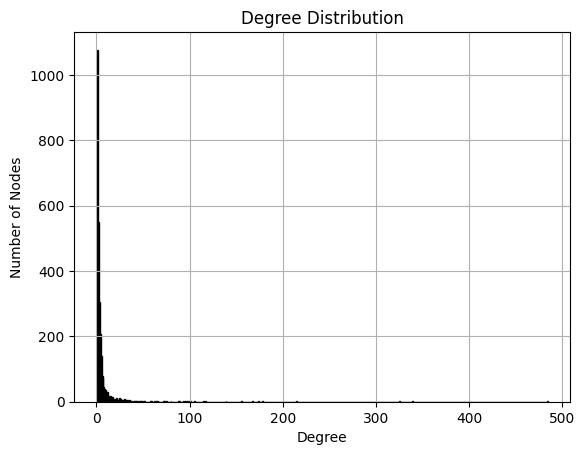

In [7]:
degrees = [d for n, d in G.degree()]
plt.figure()
plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align='left', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

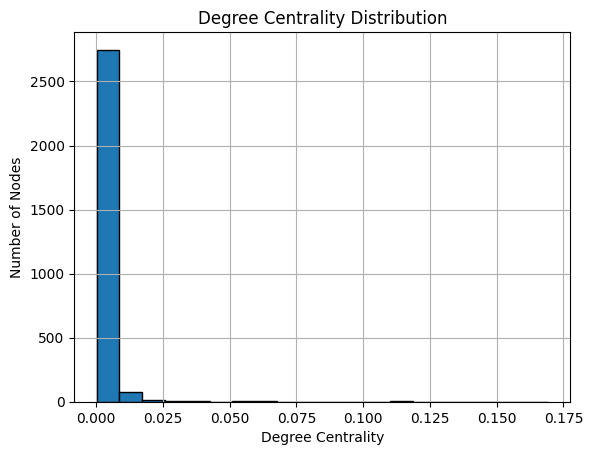

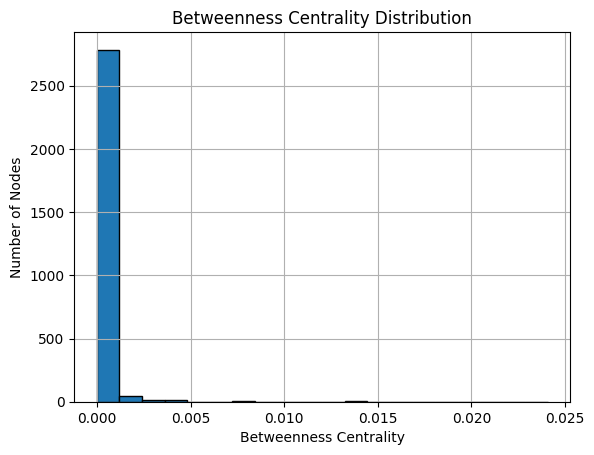

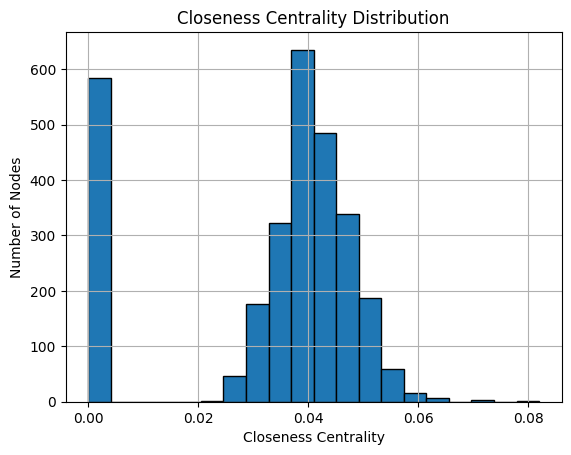

In [8]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
plt.figure()
plt.hist(list(degree_centrality.values()), bins=20, edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
plt.figure()
plt.hist(list(betweenness_centrality.values()), bins=20, edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)
plt.figure()
plt.hist(list(closeness_centrality.values()), bins=20, edgecolor='black')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()


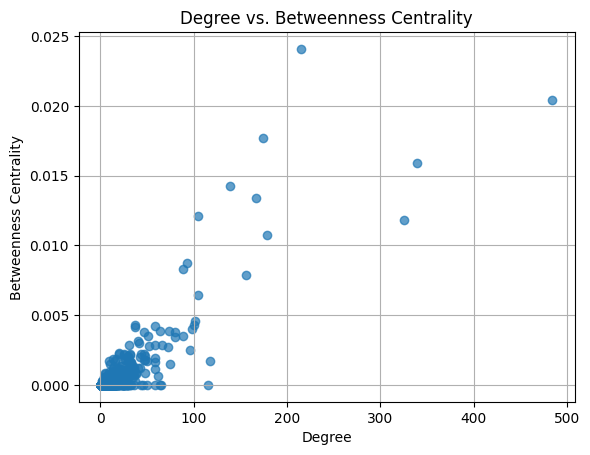

In [9]:
import matplotlib.pyplot as plt

degrees = dict(G.degree())
betweenness = nx.betweenness_centrality(G)

x = [degrees[n] for n in G.nodes()]
y = [betweenness[n] for n in G.nodes()]

plt.figure()
plt.scatter(x, y, alpha=0.7)
plt.title('Degree vs. Betweenness Centrality')
plt.xlabel('Degree')
plt.ylabel('Betweenness Centrality')
plt.grid(True)
plt.show()


Number of connected components: 26
Sizes of connected components: [2804, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 1, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2]


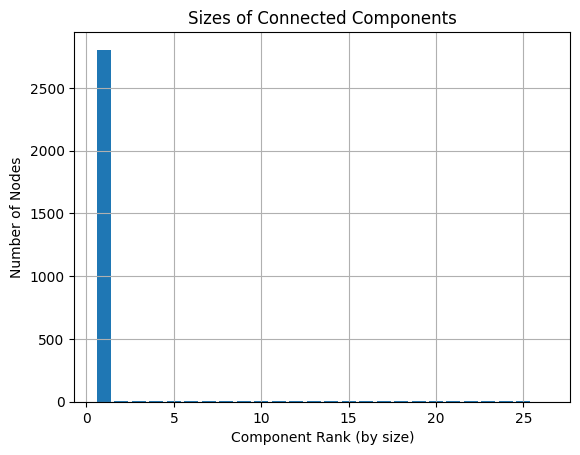

In [10]:
components = list(nx.connected_components(G.to_undirected()))
component_sizes = [len(c) for c in components]

print('Number of connected components:', len(component_sizes))
print('Sizes of connected components:', component_sizes)

# Optional: sort and plot
import matplotlib.pyplot as plt

component_sizes.sort(reverse=True)
plt.figure()
plt.bar(range(1, len(component_sizes)+1), component_sizes)
plt.title('Sizes of Connected Components')
plt.xlabel('Component Rank (by size)')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()


In [11]:
# Compute communities using Louvain method on the undirected version of your graph
partition = community_louvain.best_partition(G.to_undirected())

# Number of communities
num_communities = len(set(partition.values()))
print('Number of detected communities:', num_communities)

# Optionally, get sizes of each community
from collections import Counter

community_sizes = Counter(partition.values())
print('Sizes of communities:', community_sizes)

Number of detected communities: 43
Sizes of communities: Counter({1: 354, 3: 315, 5: 216, 12: 213, 18: 190, 0: 178, 6: 167, 10: 158, 8: 142, 4: 140, 17: 140, 2: 133, 11: 125, 14: 118, 15: 100, 7: 67, 19: 42, 16: 6, 37: 5, 31: 4, 13: 3, 20: 3, 27: 3, 32: 3, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 28: 2, 29: 2, 30: 2, 34: 2, 35: 2, 36: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 9: 2, 33: 1})


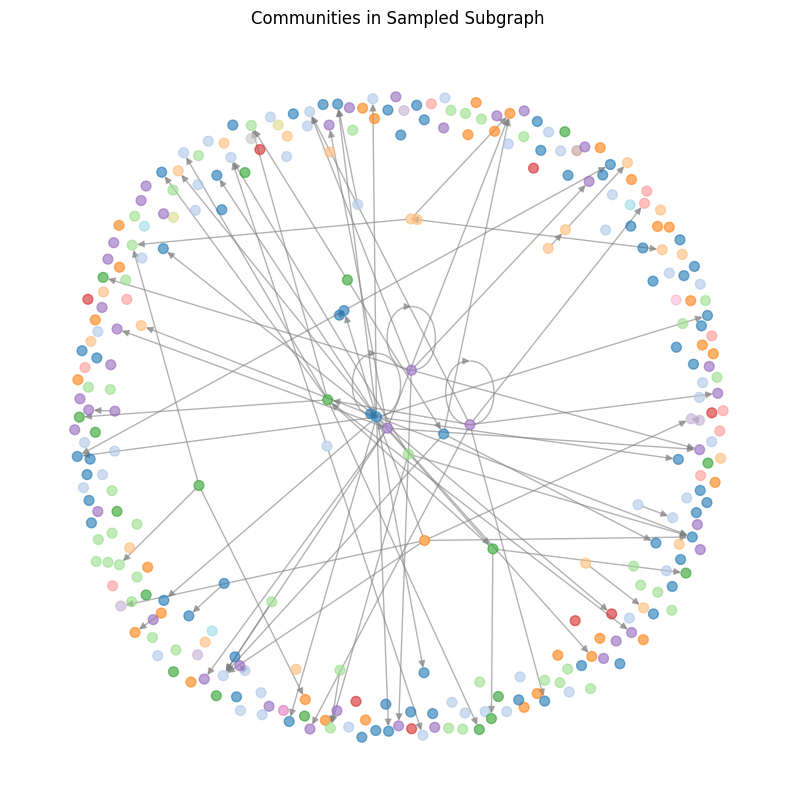

In [12]:

# Sample 300 nodes for visualization
sample_nodes = random.sample(list(G.nodes()), 300)
G_sample = G.subgraph(sample_nodes)

# Get communities for sampled nodes
partition_sample = {node: partition[node] for node in G_sample.nodes()}

# Draw with colors based on community
pos_sample = nx.spring_layout(G_sample, seed=42)
colors_sample = [partition_sample[n] for n in G_sample.nodes()]

plt.figure(figsize=(10, 10))
nx.draw_networkx(
    G_sample, pos_sample,
    with_labels=False,
    node_color=colors_sample,
    cmap=plt.cm.tab20,
    node_size=50,
    edge_color='gray',
    alpha=0.6
)
plt.title('Communities in Sampled Subgraph')
plt.axis('off')
plt.show()


In [13]:

# Convert the partition dictionary (node: community) to a DataFrame
community_df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community'])

# Save to CSV
community_df.to_csv('output/community_assignments.csv', index=False)

print("Community assignments saved to 'community_assignments.csv'")


Community assignments saved to 'community_assignments.csv'


In [14]:
modularity = community_louvain.modularity(partition, G.to_undirected())
print('Modularity score:', modularity)

Modularity score: 0.44458280058865374


In [15]:
largest_community_id = max(set(partition.values()), key=list(partition.values()).count)
nodes_in_largest = [n for n, c in partition.items() if c == largest_community_id]
G_largest_community = G.subgraph(nodes_in_largest)
print('Largest community size:', G_largest_community.number_of_nodes())

Largest community size: 354


In [16]:
for community_id in set(partition.values()):
    nodes = [n for n, c in partition.items() if c == community_id]
    G_comm = G.subgraph(nodes)
    centrality = nx.degree_centrality(G_comm)
    top_node = max(centrality, key=centrality.get)
    print(f'Community {community_id}: Top node by degree centrality is {top_node}')

Community 0: Top node by degree centrality is AR
Community 1: Top node by degree centrality is E2F1
Community 2: Top node by degree centrality is JUN
Community 3: Top node by degree centrality is NFKB1
Community 4: Top node by degree centrality is MITF
Community 5: Top node by degree centrality is HNF4A
Community 6: Top node by degree centrality is HDAC1
Community 7: Top node by degree centrality is STAT3
Community 8: Top node by degree centrality is YY1
Community 9: Top node by degree centrality is SCARF1
Community 10: Top node by degree centrality is ATF4
Community 11: Top node by degree centrality is USF1
Community 12: Top node by degree centrality is SP1
Community 13: Top node by degree centrality is AIRE
Community 14: Top node by degree centrality is POU5F1
Community 15: Top node by degree centrality is RUNX1
Community 16: Top node by degree centrality is ZNF143
Community 17: Top node by degree centrality is TFAP2A
Community 18: Top node by degree centrality is GATA1
Community 19:

In [17]:
nx.set_node_attributes(G, partition, 'community')
nx.write_gexf(G, 'graph_with_communities.gexf')
print("Graph exported to 'graph_with_communities.gexf' for Gephi.")

Graph exported to 'graph_with_communities.gexf' for Gephi.


In [18]:
# Create dictionary to collect genes by community
community_to_genes = {}

for node, data in G.nodes(data=True):
    community_id = data.get('community')
    if community_id is None:
        continue  # skip nodes without community assignment
    community_to_genes.setdefault(community_id, []).append(node)

# Print genes in each community
for comm, genes in community_to_genes.items():
    print(f"Community {comm}:")
    print(", ".join(genes))
    print()

# Optional: save each community's gene list to a separate text file
for comm, genes in community_to_genes.items():
    with open(f"community_{comm}.txt", "w") as f:
        for gene in genes:
            f.write(f"{gene}\n")

Community 0:
AATF, KLK3, CYP11B2, AR, AKR1C3, ALDH1A3, ARG1, ARG2, ATAD2, BTG2, CDK20, CDH11, CLK3, CRISP1, CYP7B1, EGFR, FOLH1, GNMT, GTF2F1, HMMR, IFI16, IGF1R, KISS1, KISS1R, KLK2, KLK4, MED1, MID1, NKX3-1, NOV, NRAS, PC, PSCA, PMEPA1, PNRC1, PTPN1, SEPT7, SERPINB5, SESN1, SRD5A3, STIM1, TMPRSS2, TRPS1, TSC1, TSC2, UCN, USP26, WEE1, WNT7B, IGF2, CCNA1, BGLAP, DDIT4, S100P, MAFA, CTCF, SPHK1, REG4, VDR, LEP, STAR, NR3C1, CYP11A1, MC2R, HOXA10, ASAP2, ATXN7, CELSR3, DMPK, ETNK2, H19, PBXIP1, IPO13, IRAK2, MEG3, PTPRG, RAD21, RARRES1, SIX5, WT1, PLD1, DDX5, PROM1, AURKA, CDKN1C, XRCC1, AMH, PGR, YWHAQ, ESRRG, NR0B1, SQSTM1, AGR2, FOXH1, FOXL2, TLR10, SULT2A1, GRHL1, GZF1, HEYL, BHLHE22, IL11, IL15, PHGDH, HOXA11, HOXA5, ARHGEF1, PTN, HOXB1, KDM4B, KHDRBS1, TSG101, UBE2C, MED23, MSX2, NCOR2, NFKBIB, SIX6, CAMP, NR5A1, PBX1, ATP1B1, BAD, CALD1, CSF1R, RLN1, RLN2, RPS6KA3, TAT, NR3C2, CABIN1, CCR6, HSD3B1, INSL3, SRY, PA2G4, PAWR, PHB2, PLAG1, CRLF1, PLAGL2, METAP2, SFTPC, RREB1, SLC39A3,

### Get gene annotations

In [19]:
import requests
import urllib.parse

def search_uniprot_for_symbol(symbol):
    # Format & encode query: gene_exact + organism_id for humans (9606)
    query = f'gene_exact:"{symbol}" AND organism_id:9606'
    query_encoded = urllib.parse.quote(query)

    # Use only supported fields: accession & go_id
    url = (
        f"https://rest.uniprot.org/uniprotkb/search"
        f"?query={query_encoded}"
        f"&fields=accession,protein_name,go_id"
        f"&format=json&size=1"
    )

    resp = requests.get(url)
    if resp.status_code != 200:
        print(f"Error searching UniProt for {symbol}: {resp.status_code} - {resp.text}")
        return None
    results = resp.json()
    if "results" not in results or not results["results"]:
        print(f"No UniProt result found for {symbol}")
        return None
    entry = results["results"][0]
    accession = entry["primaryAccession"]
    go_terms = set()
    for dbref in entry.get("uniProtKBCrossReferences", []):
        if dbref["database"] == "GO":
            go_id = dbref["id"]
            go_term = next((prop["value"] for prop in dbref.get("properties", []) if prop["key"] == "GoTerm"), "")
            go_terms.add(f"{go_id}: {go_term}")
    return accession, sorted(go_terms)

# Example usage

results = []

for gene in unique_genes:
    result = search_uniprot_for_symbol(gene)
    if result:
        accession, go_terms = result
        # Join GO terms into a single string (comma-separated)
        go_str = "; ".join(go_terms) if go_terms else ""
        results.append({
            "Gene": gene,
            "UniProt_ID": accession,
            "GO_Terms": go_str
        })
        
        print(f"\n{gene} ({accession}) roles:")
        for term in go_terms[:5]:
            print(f"- {term}")

# Convert to DataFrame
df = pd.DataFrame(results)

# Save to CSV
df.to_csv("output/gene_roles.csv", index=False)

print("Results saved to gene_roles.csv")



ABCC1 (I3L4X2) roles:
- GO:0005524: F:ATP binding
- GO:0005886: C:plasma membrane
- GO:0006869: P:lipid transport
- GO:0015431: F:ABC-type glutathione S-conjugate transporter activity
- GO:0016887: F:ATP hydrolysis activity

PBXIP1 (Q96AQ6) roles:
- GO:0000785: C:chromatin
- GO:0002532: P:production of molecular mediator involved in inflammatory response
- GO:0003712: F:transcription coregulator activity
- GO:0003713: F:transcription coactivator activity
- GO:0003714: F:transcription corepressor activity

SLC7A1 (Q5JR49) roles:
- GO:0016020: C:membrane
- GO:0022857: F:transmembrane transporter activity

HRAS (P01112) roles:
- GO:0000139: C:Golgi membrane
- GO:0000165: P:MAPK cascade
- GO:0003924: F:GTPase activity
- GO:0003925: F:G protein activity
- GO:0005525: F:GTP binding

SRD5A3 (H0Y9P9) roles:
- GO:0005789: C:endoplasmic reticulum membrane
- GO:0006488: P:dolichol-linked oligosaccharide biosynthetic process
- GO:0016095: P:polyprenol catabolic process
- GO:0019348: P:dolichol me

KeyboardInterrupt: 

--------------------------